# Ground Rydberg Dynamics

We will use `GenStateChain` to simulate some Ground-Rydberg Hamiltonian Dynamics. We will call state 0 the ground state and state 1 the excited state.

We import the module and set a chain of 2 sites.

In [1]:
import GenStateChain as GSC
import numpy as np
GSC.set_n([2,2])

Now, we need to create our driven Rydberg Hamiltonian:

$$ H = \frac{\Omega}{2}\sum_{i = 1}^3\sigma_i^x - \Delta \sum_{i=1}^3 n_i + \sum_{i < j} \frac{C_6}{r^6} n_i n_j $$

where $ n_i = |r_i\rangle\langle r_i | $ 

In [2]:
coords = [[0,0],[1,0]] # two sites, 1 unit apart
omega = 2 * np.pi * 1
delta = 0
C6 = 0

def CreateDrivenRydHamiltonian(coords, omega, delta, C6):
    # Create the Rabi drive term and detuning term
    H = GSC.Operators.zero()
    
    for i in range(len(coords)):
        H = H + omega / 2 * GSC.Operators.sigmax([i], [[0,1]]) - delta * GSC.Operators.proj(GSC.create_state_list([i],1)) # The delta multiplies a projector of state 1 on site i
    
    # Lastly we add the interaction term. Here we use an operator from the library.
    states = 1 # The interacting state is state 1. 
    H = H + GSC.Operators.PairInteraction(coords, C6, states)
    return H

H = CreateDrivenRydHamiltonian(coords, omega, delta, C6)

Now, we can make use of `Dynamics.Unitary` to calculate the dynamics. We will calculate up to 2 full cycles, and look at the expectation value of each state. Note that since we have no interaction, we expect indepdnent Rabi oscillations of the two sites.

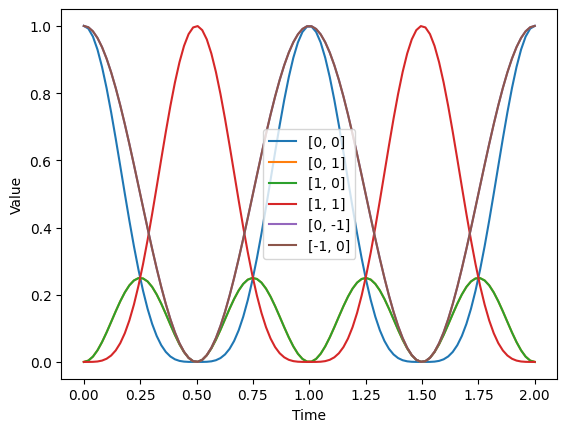

In [3]:
init_state = GSC.States.specify([0,0]) # start in ground state
tend = 2 * 2 * np.pi/omega
npts = 100
expects = [[0,0], [0,1], [1,0], [1,1], [0,-1], [-1,0]]# expectation values to calculate. Here, just projectors into each state. By default, a list is interpretted as a projector. You can also put in full fledged operators.
bPlot = 1
result = GSC.Dynamics.Unitary(H, init_state, tend, npts, expects, 1)

We have nice Rabi oscillations! Now, what if we have blockade, so we let `C6 = 100`.

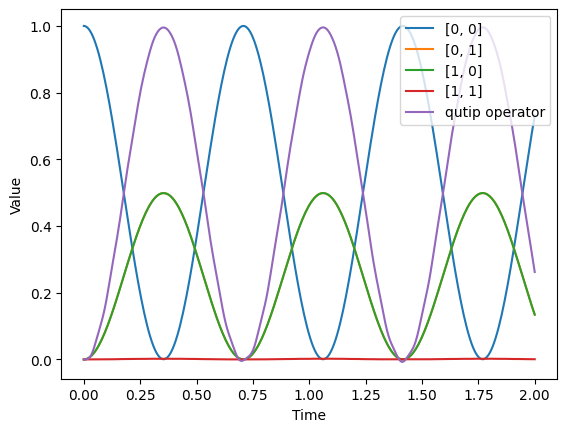

In [4]:
coords = [[0,0],[1,0]] # two sites, 1 unit apart
omega = 2 * np.pi * 1
delta = 0
C6 = 100

H = CreateDrivenRydHamiltonian(coords, omega, delta, C6)

init_state = GSC.States.specify([0,0]) # start in ground state
tend = 2 * 2 * np.pi/omega
npts = 300
# build the XX operator to check the coherence of the bright state
XXop = GSC.Operators.sigmax([0,1], [[0, 1], [0, 1]])
expects = [[0,0], [0,1], [1,0], [1,1], XXop]# expectation values to calculate. Here, just projectors into each state. By default, a list is interpretted as a projector. You can also put in full fledged operators.
bPlot = 1
result = GSC.Dynamics.Unitary(H, init_state, tend, npts, expects, 1)

# Dual Species

Now, we will explore a dual species Rydberg setup. In particular `GSC.Operators.PairInteraction` can take multiple atom types and C6 coefficients. Let's set up an array of 3 atoms, with a central atom that doesn't interact with the side atoms.

In [20]:
GSC.set_n([2,2,2]) # Have a three atom chain now

coords = [[0,0],[1,0],[2,0]] # two sites, 1 unit apart
omega = 2 * np.pi * 1
delta = 0
C6 = [[1000, 0], [1000]] # intraspecies interaction of 1000 and interspecies of 0
atom_types = [0,1,0]

def CreateDrivenRydHamiltonianDualSpecies(coords, omega, delta, C6, atom_types):
    # Create the Rabi drive term and detuning term
    H = GSC.Operators.zero()
    
    for i in range(len(coords)):
        H = H + omega / 2 * GSC.Operators.sigmax([i], [[0,1]]) - delta * GSC.Operators.proj(GSC.create_state_list([i],1)) # The delta multiplies a projector of state 1 on site i
    
    # Lastly we add the interaction term. Here we use an operator from the library.
    states = 1 # The interacting state is state 1. 
    H = H + GSC.Operators.PairInteraction(coords, C6, states, atom_types)
    return H

H = CreateDrivenRydHamiltonianDualSpecies(coords, omega, delta, C6, atom_types)

Now, we run our simulation!

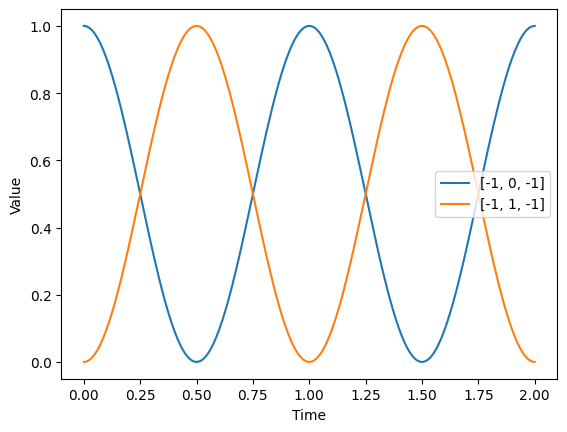

In [21]:
init_state = GSC.States.specify([0,0,0]) # start in ground state
tend = 2 * 2 * np.pi/omega
npts = 300
# build the XX operator to check the coherence of the bright state
XXop = GSC.Operators.sigmax([0,2], [[0, 1], [0, 1]])
expects = [[-1,0,-1], [-1,1,-1]] # Measure the oscillations between the species 1 atom
#expects = [[0,-1,0],[0,-1,1], [1,-1,0], [1,-1,1], XXop] # Measure the oscillations between the species 0 atoms
bPlot = 1
result = GSC.Dynamics.Unitary(H, init_state, tend, npts, expects, 1)

Looks nice! You can use the first `expects` to see the oscillations in atom 1, which is independent of atoms 0 and 2. The second `expects` to see the oscillations in atoms 0 and 2.

In [22]:
result.final_state

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[-1.37665414e-01-7.00667488e-01j]
 [ 4.44491799e-01-1.47288132e-01j]
 [-1.86886445e-05+5.25826426e-06j]
 [ 1.04723941e-05+1.98127867e-05j]
 [ 4.44491799e-01-1.47288132e-01j]
 [-2.19599494e-01+5.79297689e-02j]
 [ 1.04723941e-05+1.98127867e-05j]
 [ 8.71026256e-06-7.77238421e-06j]]